Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [5]:
install.packages("palmerpenguins")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [6]:
# uncomment the code below and execute this cell
library("palmerpenguins")
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

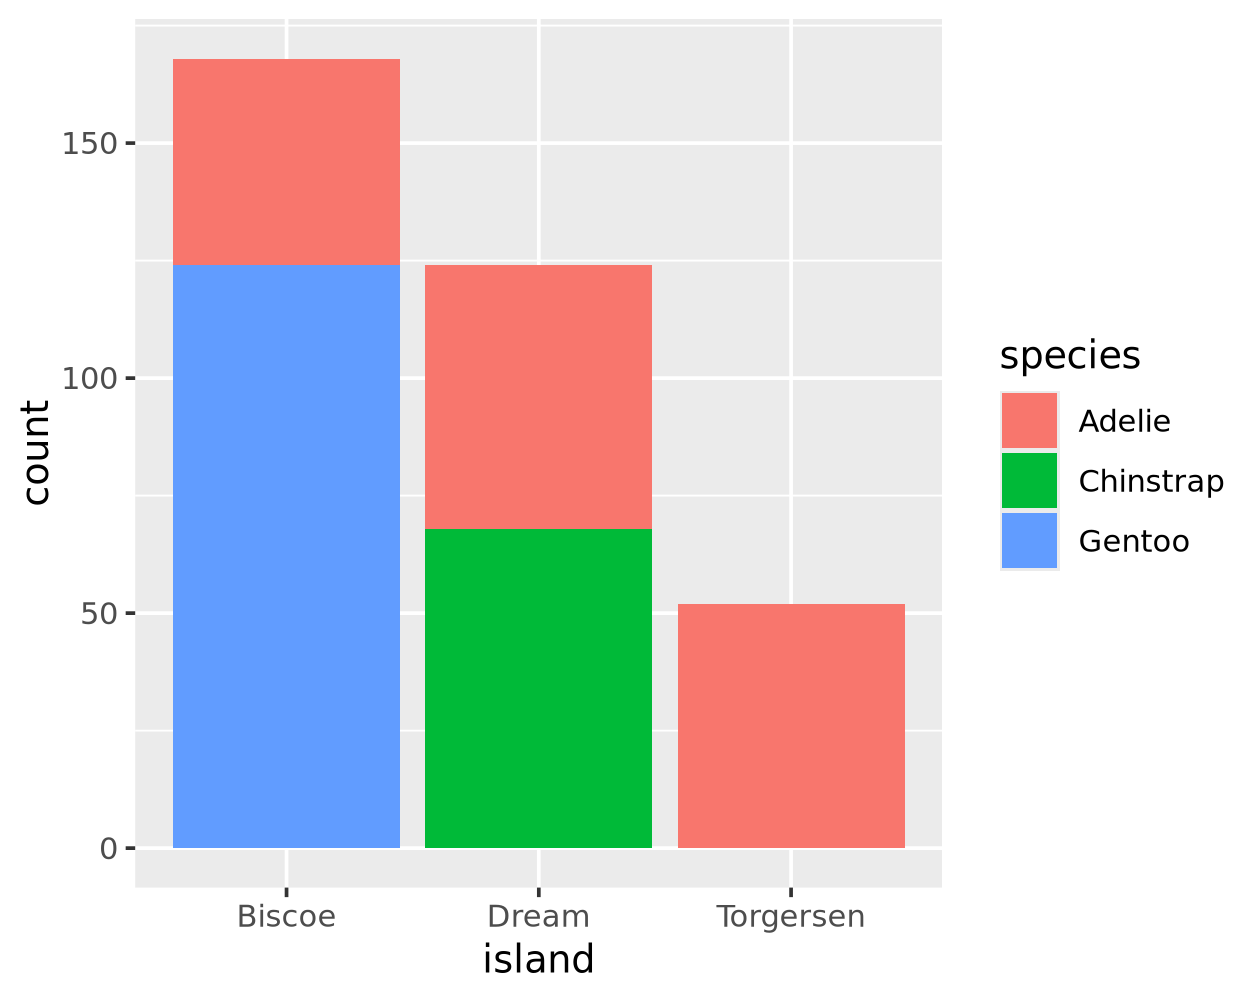

In [9]:
ggplot(penguins) + geom_bar(mapping = aes(x = island, fill = species))

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

> Adelie penguins were observed in the following islands:
> - Biscoe
> - Dream
> - Torgersen

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


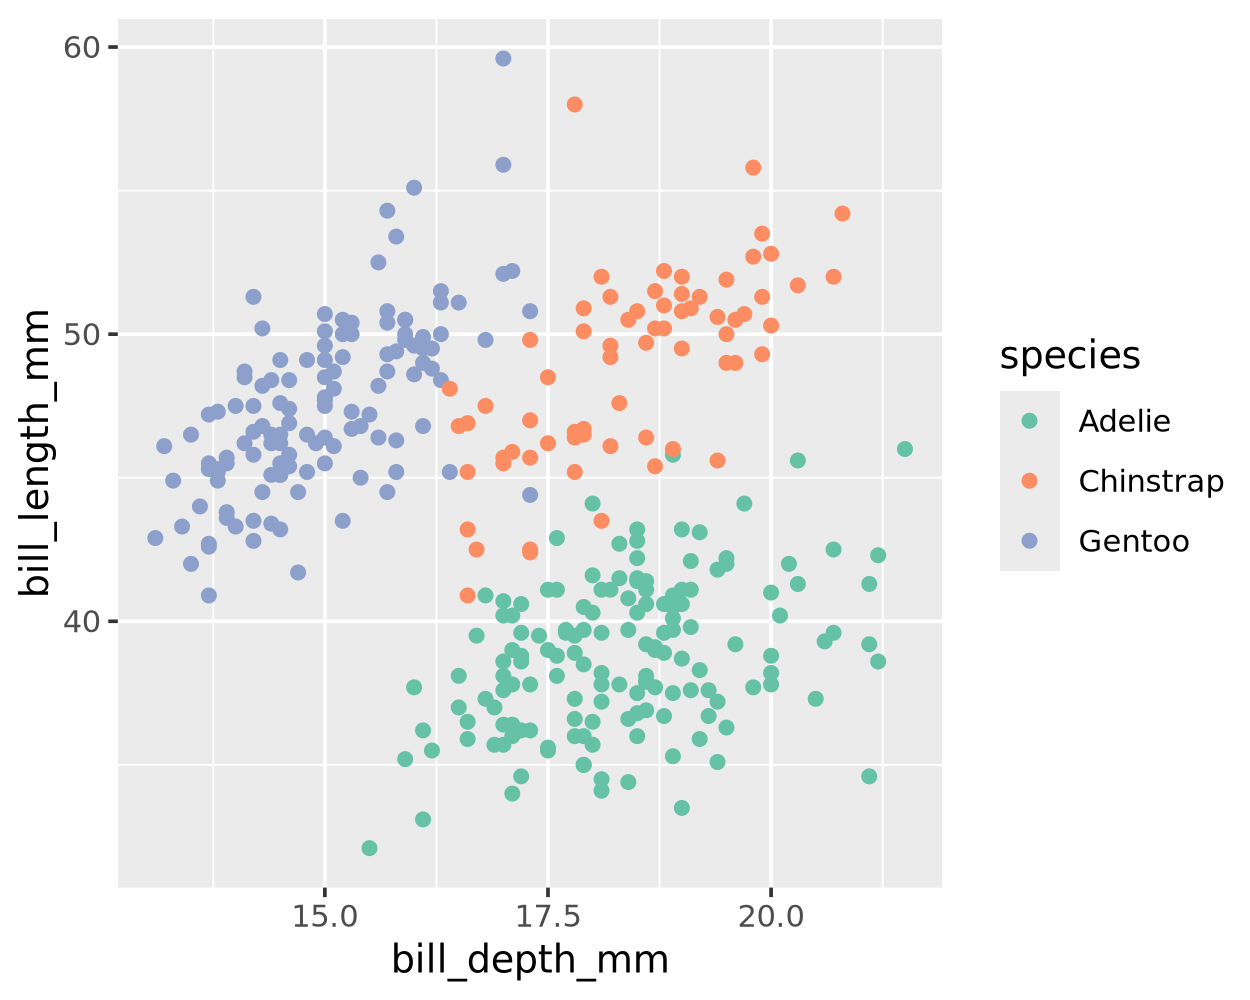

In [12]:

ggplot(penguins) + geom_point(mapping = aes(x = bill_depth_mm, y = bill_length_mm, color = species)) + scale_color_brewer(palette = "Set2")


Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


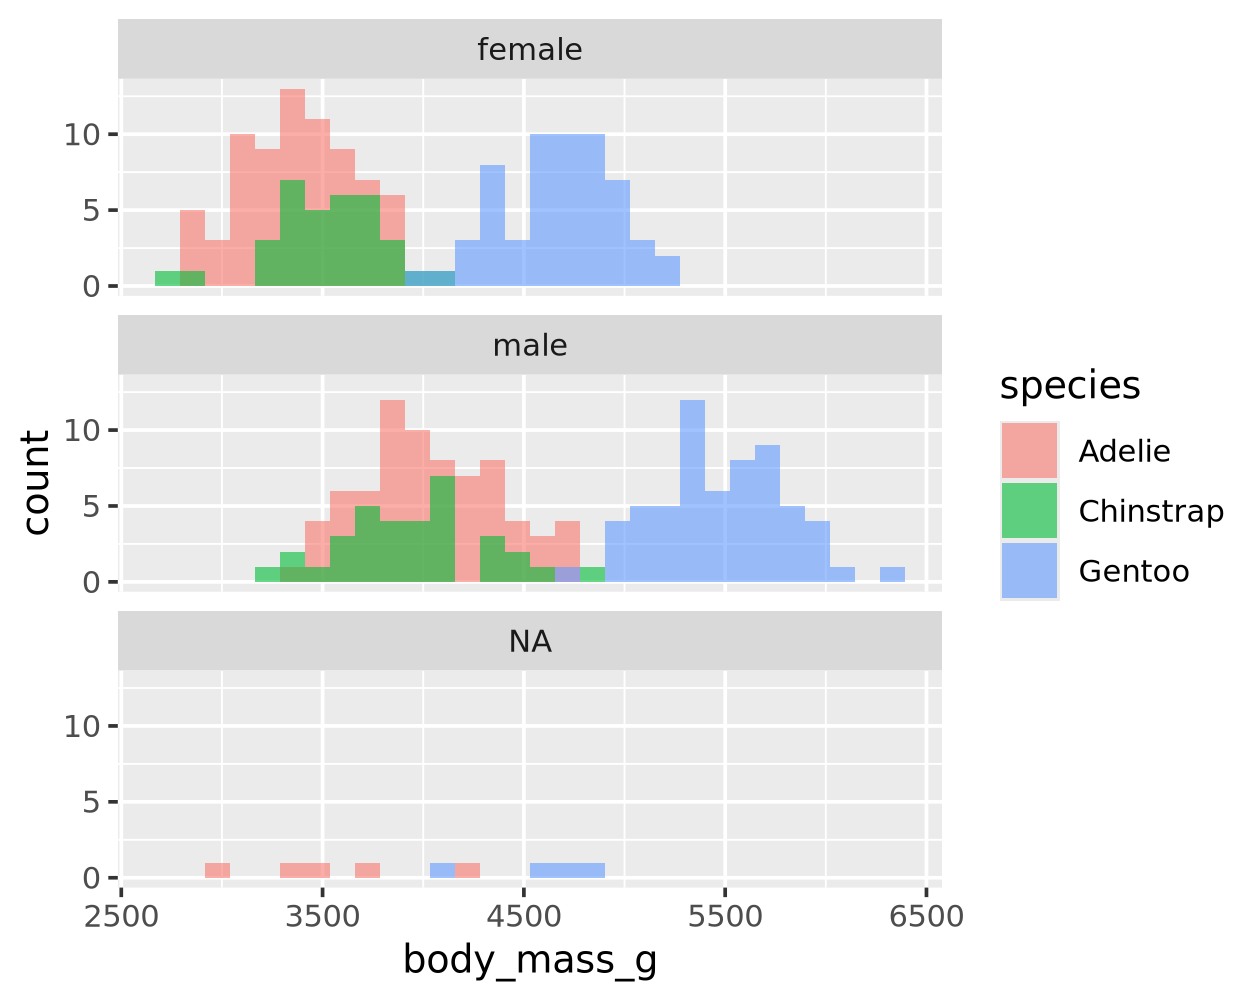

In [17]:

ggplot(penguins, aes(x = body_mass_g, fill = species)) + geom_histogram(position = "identity", alpha = 0.6) + facet_wrap(~sex, ncol = 1) + scale_color_brewer(palette = "Set2")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


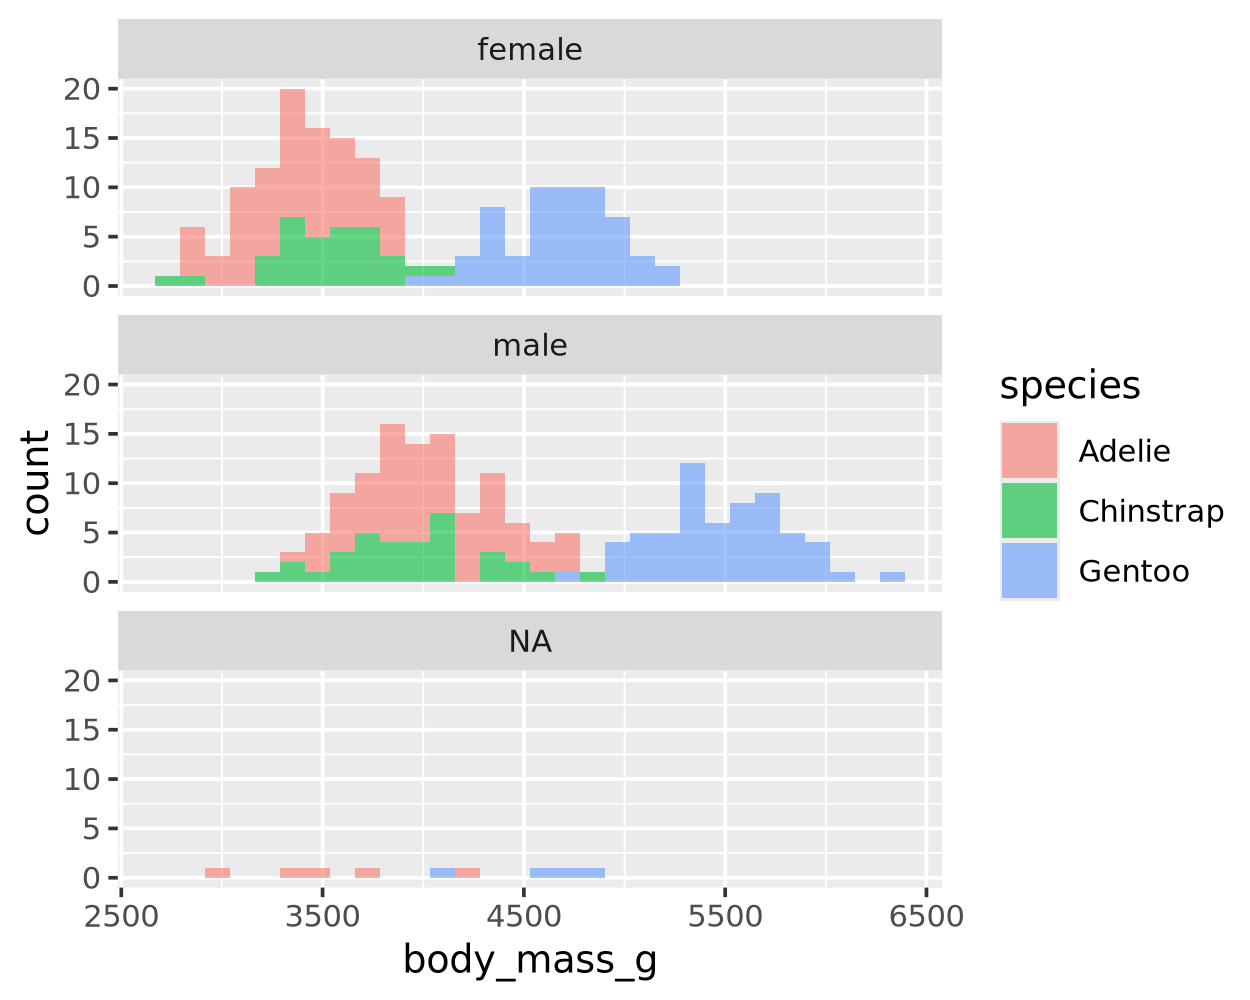

In [19]:
# Remove position variable from geom_histogram
ggplot(penguins, aes(x = body_mass_g, fill = species)) + geom_histogram(alpha = 0.6) + facet_wrap(~sex, ncol = 1) + scale_color_brewer(palette = "Set2")


What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

> When ```R position = "identity"``` is removed from the geom_histrogram the groups are now stacked on top of each other, increasing the overall count, instead of layering each group.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [42]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [43]:
# Remove the inventory variable 
myData <- select(txhousing, -inventory)

# Save the results in a dataframe
txhousing <- data.frame(myData)

# Confirm "inventory" is removed
head(txhousing)

,city,year,month,sales,volume,median,listings,date
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Abilene,2000,1,72,5380000,71400,701,2000.000
2,Abilene,2000,2,98,6505000,58700,746,2000.083
3,Abilene,2000,3,130,9285000,58100,784,2000.167
4,Abilene,2000,4,98,9730000,68600,785,2000.250
5,Abilene,2000,5,141,10590000,67300,794,2000.333
6,Abilene,2000,6,156,13910000,66900,780,2000.417


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [44]:
dallas_sub <- txhousing |> filter(city == "Dallas", year %in% c(2012, 2013))

head(dallas_sub)


,city,year,month,sales,volume,median,listings,date
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dallas,2012,1,2555,509458081,150800,16721,2012.000
2,Dallas,2012,2,3085,634067291,157100,17173,2012.083
3,Dallas,2012,3,4068,898320563,167300,17433,2012.167
4,Dallas,2012,4,4291,983333297,168700,17632,2012.250
5,Dallas,2012,5,5004,1175419749,175100,17726,2012.333
6,Dallas,2012,6,5196,1209024869,177900,17587,2012.417


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [47]:
# Add prct_sold column
dallas_sub$prct_sold <- (dallas_sub$sales/dallas_sub$listings * 100)

# Save results in dataframe
dallas_sub <- dallas_sub

# Verify it worked
head(dallas_sub)

,city,year,month,sales,volume,median,listings,date,prct_sold
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dallas,2012,1,2555,509458081,150800,16721,2012.000,15.28019
2,Dallas,2012,2,3085,634067291,157100,17173,2012.083,17.96425
3,Dallas,2012,3,4068,898320563,167300,17433,2012.167,23.33505
4,Dallas,2012,4,4291,983333297,168700,17632,2012.250,24.33643
5,Dallas,2012,5,5004,1175419749,175100,17726,2012.333,28.22972
6,Dallas,2012,6,5196,1209024869,177900,17587,2012.417,29.54455


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [56]:
dallas_summary <- dallas_sub |> # full dataset
    group_by(month) |>  # group by month
    summarize(avg_prct_sold = mean(prct_sold, na.rm = TRUE)) # calc avg of each month

print(dallas_summary)

# A tibble: 12 × 2
   month avg_prct_sold
   <int>         <dbl>
 1     1          20.5
 2     2          23.5
 3     3          32.2
 4     4          34.5
 5     5          38.2
 6     6          37.2
 7     7          37.1
 8     8          38.5
 9     9          31.8
10    10          32.1
11    11          30.6
12    12          35.5


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [57]:
dallas_summary |> slice_max(avg_prct_sold, n = 3)


month,avg_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [58]:
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
  group_by(month) |>
  summarize(mean_prct_sold = mean(prct_sold)) |>
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


> The code did the following:
> 1. Began with the entire texas housing dataset
> 2. Filtered the data down to only the city of Dallas and the years 2012 and 2013
> 3. The column "prct_sold" was added and it calculated the percentage of houses sold based on sales and listings
> 4. The data was grouped by month
> 5. The average percent sold was calculated for each month
> 6. The 3 months with the highest average percent sold was returned
> This was a concise method of everthing that was achieved above.